<a href="https://colab.research.google.com/github/gitarshmah/Boolean_Gang/blob/ML-Framework/3MINDIA_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36085 sha256=c524edf84cd50ec222dc6cff17db62d9b14520f72b8dd71484c7869a138a8934
  Stored in directory: /root/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


In [2]:
import nsepy as nse
import datetime
from datetime import date as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py

In [3]:
comp_symbol = '3MINDIA'

## Load Dataset

In [4]:
today = dt.today()
two_yrs = today - datetime.timedelta(days = int(2.5*365))

In [5]:
#Load dataset
stock = nse.get_history(symbol=comp_symbol, index = False, start=two_yrs, end=today)

In [6]:
stock

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-12,3MINDIA,EQ,21752.15,21800.00,21800.00,21260.30,21579.65,21376.05,21470.70,2180,4.680612e+12,1152,1019,0.4674
2020-08-13,3MINDIA,EQ,21376.05,21699.95,22000.00,21521.00,21950.00,21888.55,21870.42,4930,1.078212e+13,2666,2072,0.4203
2020-08-14,3MINDIA,EQ,21888.55,21000.00,21299.95,20800.00,20880.00,20903.65,20991.53,8567,1.798344e+13,3793,3779,0.4411
2020-08-17,3MINDIA,EQ,20903.65,20903.70,20998.35,20750.00,20872.00,20929.20,20844.69,1867,3.891703e+12,1056,851,0.4558
2020-08-18,3MINDIA,EQ,20929.20,20941.00,21089.95,20700.00,20710.00,20782.30,20918.40,2092,4.376129e+12,1074,926,0.4426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,3MINDIA,EQ,23876.65,23996.05,24225.00,23280.50,23995.00,24086.55,23822.78,4076,9.710165e+12,2701,1696,0.4161
2022-09-30,3MINDIA,EQ,24086.55,23900.00,24850.00,23821.90,24355.00,24606.30,24436.81,5968,1.458389e+13,3131,2810,0.4708
2022-10-03,3MINDIA,EQ,24606.30,24900.00,24900.00,23675.05,23990.00,24295.30,24254.16,4824,1.170021e+13,2961,1988,0.4121


In [7]:
df = stock

## Analysis

In [8]:
stock['MA60'] = df['Close'].rolling(window=45, min_periods=0).mean()
stock['MA45'] = df['Close'].rolling(window=15, min_periods=0).mean()
stock['MA90'] = df['Close'].rolling(window=90, min_periods=0).mean()

In [12]:
fig = make_subplots(rows=2, cols = 1, shared_xaxes=True, subplot_titles=[comp_symbol, 'Volume'], vertical_spacing=0.10, row_heights=[0.7, 0.3]) #vertical_spacing, row_width

fig.add_trace(go.Candlestick(x=df.index, open=stock['Open'], close=stock['Close'], high=stock['High'], low=stock['Low'], name=comp_symbol) , row=1, col=1 )

fig.add_trace(go.Scatter(x=df.index, y=stock['MA90'], marker_color='lightgrey', name='MA90'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=stock['MA60'], marker_color='black', name='MA60'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=stock['MA45'], marker_color='grey', name='MA45'), row=1, col=1)

fig.add_trace(go.Bar(x=df.index, y=stock['Volume'], marker_color='red', showlegend=False), row=2, col=1)

fig.update_layout(
    title= comp_symbol + ' historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price (Rs/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=False,
    width=1300,
    height=500,
    margin=dict(l=50, r=50, b=50, t=100, pad=3),
    paper_bgcolor='LightSteelBlue'
)
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show(renderer='colab')

## Data Preprocessing

In [13]:
pred_days = 45
timestep = 90

In [14]:
df = df[['Close']]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))

# df_train = df

# Test = 45 days
df_test = df[-pred_days:]
df_train = df[:-pred_days]
df_test.shape, df_train.shape

# Train-Val split (70-30)
trainSize = int(len(df_train) * 0.8)
df_val = df_train[trainSize:]
df_train = df_train[:trainSize]

# Create Train-Val 
train_set = df_train.values
val_set = df_val.values

train_set = scaler.fit_transform(np.array(train_set).reshape(-1,1))
val_set = scaler.fit_transform(np.array(val_set).reshape(-1,1))

def data_prep(dataset, timestep):
  X, y = [], []
  for i in range(timestep, dataset.shape[0]):
    X.append(dataset[i-timestep:i, 0])
    y.append(dataset[i,0])
  
  return (np.array(X), np.array(y))


(x_train, y_train) = data_prep(train_set, timestep)
(x_val, y_val) = data_prep(val_set, timestep)

x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, newshape = (x_val.shape[0], x_val.shape[1], 1))

  # return (x_train, y_train), (x_val, y_val), scaler

## Define the model

In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import Huber

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

opt = Adam(learning_rate = 0.001)
huber = Huber()
model.compile(optimizer = opt, loss=huber, metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 90, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 90, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

## Train the model

In [29]:
# Train the model
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(x_val, y_val)) 

Epoch 1/100
10/10 - 2s - loss: 0.0046 - mae: 0.0766 - val_loss: 0.0050 - val_mae: 0.0883 - 2s/epoch - 191ms/step
Epoch 2/100
10/10 - 2s - loss: 0.0047 - mae: 0.0784 - val_loss: 0.0058 - val_mae: 0.0944 - 2s/epoch - 168ms/step
Epoch 3/100
10/10 - 1s - loss: 0.0044 - mae: 0.0733 - val_loss: 0.0066 - val_mae: 0.1011 - 1s/epoch - 127ms/step
Epoch 4/100
10/10 - 1s - loss: 0.0045 - mae: 0.0748 - val_loss: 0.0046 - val_mae: 0.0838 - 1s/epoch - 125ms/step
Epoch 5/100
10/10 - 1s - loss: 0.0042 - mae: 0.0733 - val_loss: 0.0035 - val_mae: 0.0728 - 1s/epoch - 128ms/step
Epoch 6/100
10/10 - 1s - loss: 0.0046 - mae: 0.0750 - val_loss: 0.0018 - val_mae: 0.0530 - 1s/epoch - 127ms/step
Epoch 7/100
10/10 - 1s - loss: 0.0042 - mae: 0.0718 - val_loss: 0.0026 - val_mae: 0.0628 - 1s/epoch - 120ms/step
Epoch 8/100
10/10 - 1s - loss: 0.0044 - mae: 0.0726 - val_loss: 0.0044 - val_mae: 0.0831 - 1s/epoch - 132ms/step
Epoch 9/100
10/10 - 1s - loss: 0.0043 - mae: 0.0747 - val_loss: 0.0030 - val_mae: 0.0676 - 1s/ep

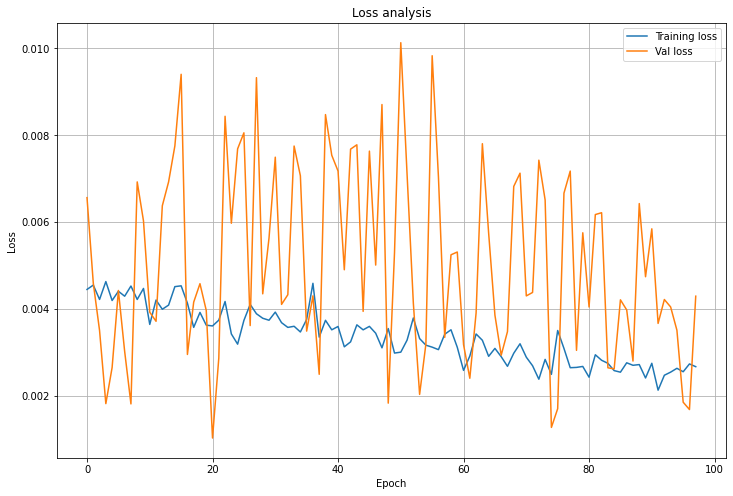

In [30]:
plt.figure(figsize = (12, 8))
plt.plot(hist.history['loss'][2:], label = "Training loss")
plt.plot(hist.history['val_loss'][2:], label = "Val loss")
plt.title("Loss analysis")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid("both")

## Model Evaluation

In [31]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

train_pred = scaler.inverse_transform(train_pred)
val_pred = scaler.inverse_transform(val_pred)

train_set_temp = scaler.inverse_transform(train_set)
val_set_temp = scaler.inverse_transform(val_set)

1/1 [==============================] - 0s 59ms/step


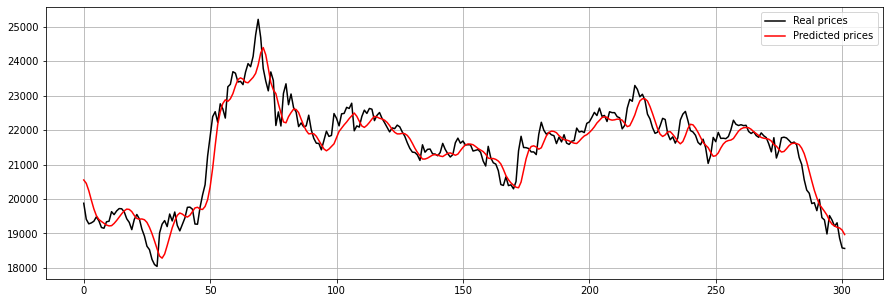

In [32]:
x1 = train_set_temp[-(train_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x1, color = 'black', label = 'Real prices')
plt.plot(train_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

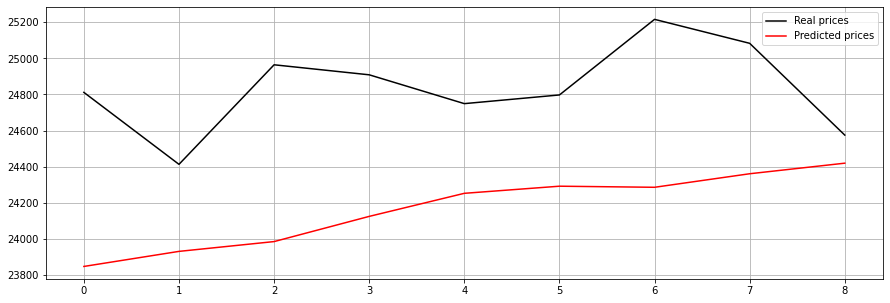

In [33]:
x2 = val_set_temp[-(val_pred.shape[0]):]
plt.figure(figsize = (15,5))
plt.plot(x2, color = 'black', label = 'Real prices')
plt.plot(val_pred, color='red', label='Predicted prices')
plt.legend()
plt.grid()

## Prediction

In [34]:
train_dataset = pd.concat([df_train, df_val])

train_values = train_dataset.values

In [35]:
def prediction(timestep, inp):
  input = inp[-(timestep+pred_days):]

  input = scaler.fit_transform(np.array(input).reshape(-1,1))

  x_test = []
  for i in range(timestep, input.shape[0]):
    x_test.append(input[(i - timestep) : i , 0])
  x_test = np.array(x_test)

  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  return x_test, scaler

In [36]:
x_test, scaler = prediction(timestep, train_values)
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

2/2 [==============================] - 0s 29ms/step


In [37]:
# date_list = [today + datetime.timedelta(days=x) for x in range(pred_days)]
# pred_df = pd.DataFrame(data=y_pred, index=date_list)

# plt.figure(figsize=(20,5))
# plt.plot(df[-(timestep):], color='black', label='Real Price(Till today)')
# plt.plot(pred_df, color='red', label=f'Predictions for next {pred_days} days')
# plt.grid()
# plt.legend()
# plt.title(f"{comp_symbol} Stock")
# plt.xlabel("Date")
# plt.ylabel("Rs per share")

Text(0, 0.5, 'Price (Rs/Share)')

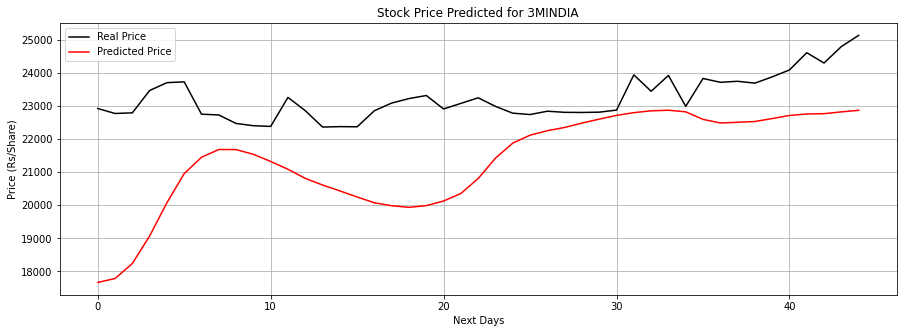

In [38]:
plt.figure(figsize=(15,5))

plt.plot(df_test.values, color='black', label='Real Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.grid()
plt.legend()
plt.title(f"Stock Price Predicted for {comp_symbol}")
plt.xlabel("Next Days")
plt.ylabel("Price (Rs/Share)")